In [2]:
from pandas import read_csv
from datetime import datetime
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt

### Baseline Forecast
A baseline in forecast performance provides a point of comparison. Baseline forecast should be simple, fast and repeatable e.g. using the persistence algorithm

#### Zero Rule Algorithm
This algorithm predicts the majority class in the case of classification, or the average outcome in the case of regression. This does not respect the serial correlation structure in time series datasets.

#### Persistence Algorithm
Use the value at the current time step (t) to predict the expected outcome at the next time step (t+1). Steps:
1. Transform the univariate dataset into a supervised learning problem.
2. Establish the train and test datasets for the test harness.
3. Define the persistence model.
4. Make a forecast and establish a baseline performance.
5. Review the complete example and plot the output.

In [5]:
# Create a lagged datset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('datasets\shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
dataframe.head(5)

t    t+1
0    NaN  266.0
1  266.0  145.9
2  145.9  183.1
3  183.1  119.3
4  119.3  180.3

In [15]:
# Split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

print('train_X ', train_X.shape)
print('train_y ', train_y.shape)
print('test_X ', test_X.shape)
print('test_y ', test_y.shape)

train_X  (22,)
train_y  (22,)
test_X  (13,)
test_y  (13,)


In [23]:
# Persistence model
def model_persistence(x):
    return x

predictions = list()
for x in test_X:
    ypredict = model_persistence(x)
    predictions.append(ypredict)
print('predictions ', len(predictions))

predictions  13


In [25]:
# Evaluate forecast
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 133.156


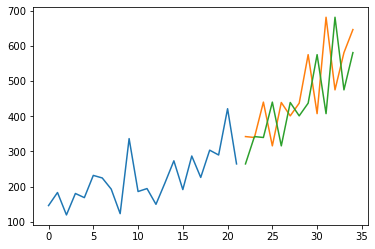

In [26]:
# Plot predictions and expected results
pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.show()